In [701]:
import pandas as pd
import numpy as np
import seaborn as sb
import missingno as mo
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from collections import Counter
from scipy.stats import skew,norm
from scipy import stats


In [702]:
df=pd.read_csv(r'C:\Users\Ajay\Desktop\Sidd\Python\Machine Learning\Machine learning 1\Datasets\kc_house_data.csv')

In [703]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


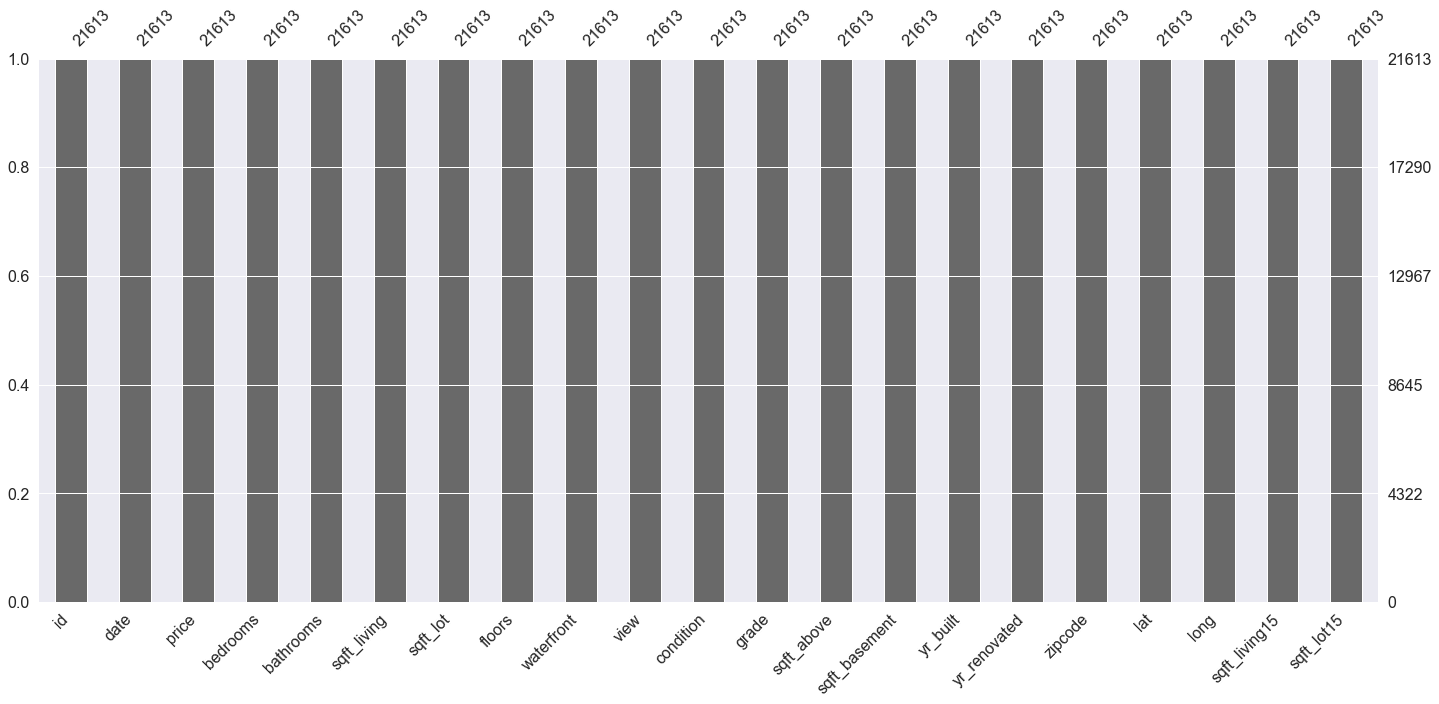

In [704]:
mo.bar(df)

In [705]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [707]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [708]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [709]:
cor=df.corr()

In [710]:
cor.T

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [711]:
df['year']=pd.DatetimeIndex(df['date']).year

In [712]:
df['month']=df['date'].str[4:6]

In [713]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [714]:
Num=cor['price'].sort_values(ascending=False).to_frame()[:]
Num

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


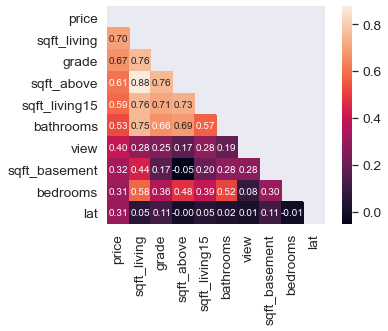

In [715]:
k = 10 #number of variables for heatmap
cols = Num.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sb.set(font_scale=1.25)
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
hm = sb.heatmap(cm, cbar=True, mask = mask, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [716]:
#feature Seclection 
newdf= df[['price','sqft_living','bathrooms','view','sqft_basement','waterfront','floors','year','month','grade','bedrooms']]

In [717]:
newdf.head()

,price,sqft_living,bathrooms,view,sqft_basement,waterfront,floors,year,month,grade,bedrooms
0,221900.0,1180,1.00,0,0,0,1.0,2014,10,7,3
1,538000.0,2570,2.25,0,400,0,2.0,2014,12,7,3
2,180000.0,770,1.00,0,0,0,1.0,2015,02,6,2
3,604000.0,1960,3.00,0,910,0,1.0,2014,12,7,4
4,510000.0,1680,2.00,0,0,0,1.0,2015,02,8,3


In [718]:
columns=[['view','bathrooms','waterfront','floors','year','month','grade','bedrooms']]

In [719]:
newdf['view']=newdf['view'].astype(str)

In [720]:
newdf['bathrooms']=newdf['bathrooms'].astype(str)

In [721]:
newdf['waterfront']=newdf['waterfront'].astype(str)

In [722]:
newdf['floors']=newdf['floors'].astype(str)

In [723]:
newdf['year']=newdf['year'].astype(str)

In [724]:
newdf['grade']=newdf['grade'].astype(str)

In [725]:
newdf['bedrooms']=newdf['bedrooms'].astype(str)

In [726]:
newdf.skew()

price             4.024069
sqft_living       1.471555
bathrooms         0.511108
view              3.395750
sqft_basement     1.577965
waterfront       11.385108
floors            0.616177
year              0.757299
month             0.063130
grade             0.771103
bedrooms          1.974300
dtype: float64

In [727]:
newdf['price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [728]:
newdf['price']=np.log1p(newdf['price'])

In [729]:
newdf['price'].head()

0    12.309987
1    13.195616
2    12.100718
3    13.311331
4    13.142168
Name: price, dtype: float64

In [730]:
newdf['price'].skew()

0.4280765149574905

In [731]:
#newdf['price']=np.log1p(newdf['price'])
#newdf['price']=np.expm1(newdf['price'])

In [732]:
newdf['price']

0        12.309987
1        13.195616
2        12.100718
3        13.311331
4        13.142168
           ...    
21608    12.793862
21609    12.899222
21610    12.904461
21611    12.899222
21612    12.691584
Name: price, Length: 21613, dtype: float64

In [733]:
newdf['price'].skew()

0.4280765149574905

In [734]:
numeric_feats = newdf.dtypes[newdf.dtypes != "object"].index
skewed_feats = newdf[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
sqft_basement,1.577856
sqft_living,1.471453
price,0.428047


In [735]:
   # """
#skewness = skewness[abs(skewness) > 0.75]
#print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

#from scipy.special import boxcox1p
#skewed_features = skewness.index
#lam = 0.15
#for feat in skewed_features:
    #all_data[feat] += 1
   # newdf[feat] = boxcox1p(newdf[feat], lam)
  #  """

In [736]:
newdf.head(5)

,price,sqft_living,bathrooms,view,sqft_basement,waterfront,floors,year,month,grade,bedrooms
0,12.309987,1180,1.0,0,0,0,1.0,2014,10,7,3
1,13.195616,2570,2.25,0,400,0,2.0,2014,12,7,3
2,12.100718,770,1.0,0,0,0,1.0,2015,02,6,2
3,13.311331,1960,3.0,0,910,0,1.0,2014,12,7,4
4,13.142168,1680,2.0,0,0,0,1.0,2015,02,8,3


In [737]:
#newdf['sqft_basement']=np.log1p(newdf['sqft_basement'])

In [738]:
#newdf['sqft_living']=np.log1p(newdf['sqft_living'])

In [739]:
newdf.skew()

price             0.428077
sqft_living       1.471555
bathrooms         0.511108
view              3.395750
sqft_basement     1.577965
waterfront       11.385108
floors            0.616177
year              0.757299
month             0.063130
grade             0.771103
bedrooms          1.974300
dtype: float64

In [740]:
categorcial=newdf.select_dtypes(include='object')

In [741]:
categorcial.columns

Index(['bathrooms', 'view', 'waterfront', 'floors', 'year', 'month', 'grade',
       'bedrooms'],
      dtype='object')

In [742]:
cola=['bathrooms', 'view', 'waterfront', 'floors', 'year', 'month', 'grade',
       'bedrooms']

In [743]:
newdf.shape

(21613, 11)

In [744]:
dummies=pd.get_dummies(newdf,columns=cola,drop_first=True)

In [745]:
dummies.shape

(21613, 77)

In [746]:
newdf.columns

Index(['price', 'sqft_living', 'bathrooms', 'view', 'sqft_basement',
       'waterfront', 'floors', 'year', 'month', 'grade', 'bedrooms'],
      dtype='object')

In [747]:
dummies.columns

Index(['price', 'sqft_living', 'sqft_basement', 'bathrooms_0.5',
       'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5',
       'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5',
       'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5',
       'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5',
       'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5',
       'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25', 'bathrooms_6.5',
       'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75', 'bathrooms_8.0',
       'view_1', 'view_2', 'view_3', 'view_4', 'waterfront_1', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'year_2015',
       'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07',
       'month_08', 'month_09', 'month_10', 'month_11', 'month_12', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5',
       'g

In [748]:
X=dummies.drop(labels='price',axis=1)
y=dummies[['price']]

In [749]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [750]:
"""
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\nsc=MinMaxScaler()\nX_train_std=sc.fit_transform(X_train)\nX_test_std=sc.fit_transform(X_test)\n'

In [751]:
#left for STandard Scaler and Min Max Scalar 


In [752]:
linear=LinearRegression()

In [753]:
linear.fit(X_train,y_train)

LinearRegression()

In [754]:
y_pred_test=linear.predict(X_test)

In [755]:
y_pred_train=linear.predict(X_train)

In [756]:
y_test

,price
12626,12.254391
8629,13.262127
2992,12.676079
17161,13.235694
14238,12.388398
...,...
14050,13.241924
3513,12.732282
6351,12.632976
455,13.219492


In [757]:
y_pred_test

array([[12.56300213],
       [13.31367154],
       [12.55411458],
       ...,
       [12.81762594],
       [13.35347322],
       [13.36773149]])

In [758]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [759]:
print(linear.score(X_train,y_train))
print(linear.score(X_test,y_test))

0.6110835592029347
0.6029543035280069


In [760]:
RMSE_train

0.32956232702313704

In [761]:
RMSE_test

0.32730622908208673

In [762]:
newdf.mean()

price              13.047819
sqft_living      2079.899736
view                     inf
sqft_basement     291.509045
waterfront               inf
year                     inf
month                    inf
grade                    inf
bedrooms                 inf
dtype: float64

In [765]:
13.04*10

130.39999999999998

In [766]:
130.39/100

1.3038999999999998